Let’s assume that a hobby botanist is interested in distinguishing what the species is of
some iris flowers that she found. She has collected some measurements associated
with the iris: the length and width of the petals, and the length and width of the sepal, 
all measured in centimeters.

She also has the measurements of some irises that have been previously identified by
an expert botanist as belonging to the species Setosa, Versicolor or Virginica. For
these measurements, she can be certain of which species each iris belongs to. Let’s
assume that these are the only species our hobby botanist will encounter in the wild.
Our goal is to build a machine learning model that can learn from the measurements
of these irises whose species is known, so that we can predict the species for a new
iris.

Since we have measurements for which we know the correct species of iris, this is a
supervised learning problem. In this problem, we want to predict one of several
options (the species of iris). This is an example of a classification problem. The possi‐
ble outputs (different species of irises) are called classes.
Since every iris in the dataset belongs to one of three classes this problem is a three-
class classification problem.

The desired output for a single data point (an iris) is the species of this flower. For a
particular data point, the species it belongs to is called its **label**.

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()

dict_keys(['target', 'feature_names', 'DESCR', 'data', 'target_names'])

**DESCR** is a short description of the dataset.

In [2]:
print (iris['DESCR'][:193] + '\n...')

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


The value of the key **target names** is an array of strings, containign the species of flower which we want to predict

In [3]:
print (iris['target_names'])

['setosa' 'versicolor' 'virginica']


The feature names are a list of stirings giving the description of each feature.

In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The data itself is contained in the target and data fields. The data contains the
numeric measurements of sepal length, sepal width, petal length, and petal width in a
numpy array

In [5]:
type(iris['data'])

numpy.ndarray

The rows in the data array correspond to flowers, while the columns represent the
four measurements that were taken for each flower

In [6]:
iris['data'].shape

(150, 4)

We see that the data contains measurements for 150 different flowers.
Remember that the individual items are called samples in machine learning, and their
properties are called features.

The shape of the data array is the number of samples times the number of features.

In [7]:
iris['data'][:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

The target array contains the species of each of the flowers that were measured, also
as a numpy array

In [8]:
type(iris['target'])

numpy.ndarray

The target is a one-dimensional array, with one entry per flower

In [9]:
iris['target'].shape

(150,)

The species are encoded as integers from 0 to 2

The meaning of the numbers are given by the iris['target_names'] array: 0 means
Setosa, 1 means Versicolor and 2 means Virginica.

In [10]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We want to build a machine learning model from this data that can predict the spe‐
cies of iris for a new set of measurements.

Before we can apply our model to new measurements, we need to know whether our
model actually works, that is whether we should trust its predictions.
Unfortunately, we can not use the data we use to build the model to evaluate it. This is
because our model can always simply remember the whole training set, and will
therefore always predict the correct label for any point in the training set. This
“remembering” does not indicate to us whether our model will generalize well, in
other words whether it will also perform well on new data. So before we apply our
model to new measurements, we will want to know whether we can trust its predic‐
tions.

To assess the models’ performance, we show the model new data (that it hasn’t seen
before) for which we have labels. This is usually done by splitting the labeled data we
have collected (here our 150 flower measurements) into two parts.
The part of the data is used to build our machine learning model, and is called the
training data or training set. The rest of the data will be used to access how well the
model works and is called test data, test set or hold-out set.

Scikit-learn contains a function that shuffles the dataset and splits it for you, the
train_test_split function.

This function extracts 75% of the rows in the data as the training set, together with
the corresponding labels for this data. The remaining 25% of the data, together with
the remaining labels are declared as the test set.

In scikit-learn, data is usually denoted with a capital X , while labels are denoted by a
lower-case y .

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state = 0)

The train_test_split function shuffles the dataset using a pseudo random number
generator before making the split. If we would take the last 25% of the data as a test
set, all the data point would have the label 2 , as the data points are sorted by the label
(see the output for iris['target'] above). Using a tests set containing only one of
the three classes would not tell us much about how well we generalize, so we shuffle
our data, to make sure the test data contains data from all classes.

To make sure that we will get the same output if we run the same function several
times, we provide the pseudo random number generator with a fixed seed using the
random_state parameter. This will make the outcome deterministic, so this line will
always have the same outcome. We will always fix the random_state in this way when
using randomized procedures in this book.

The output of the train_test_split function are X_train , X_test , y_train and
y_test , which are all numpy arrays. X_train contains 75% of the rows of the dataset,
and X_test contains the remaining 25%:

In [15]:
X_train.shape

(112, 4)

In [16]:
X_test.shape

(38, 4)

Before building a machine learning model, it is often a good idea to inspect the data,
to see if the task is easily solvable without machine learning, or if the desired infor‐
mation might not be contained in the data.

Additionally, inspecting your data is a good way to find abnormalities and peculiari‐
ties. Maybe some of your irises were measured using inches and not centimeters, for
example. In the real world, inconsistencies in the data and unexpected measurements
are very common.

One of the best ways to inspect data is to visualize it. One way to do this is by using a
scatter plot.

A scatter plot of the data puts one feature along the x-axis, one feature along the y-
axis, and draws a dot for each data point.

Unfortunately, computer screens have only two dimensions, which allows us to only
plot two (or maybe three) features at a time. It is difficult to plot datasets with more
than three features this way.

One way around this problem is to do a pair plot, which looks at all pairs of two fea‐
tures. If you have a small number of features, such as the four we have here, this is
quite reasonable. You should keep in mind that a pair plot does not show the interac‐
tion of all of features at once, so some interesting aspects of the data may not be
revealed when visualizing it this way.

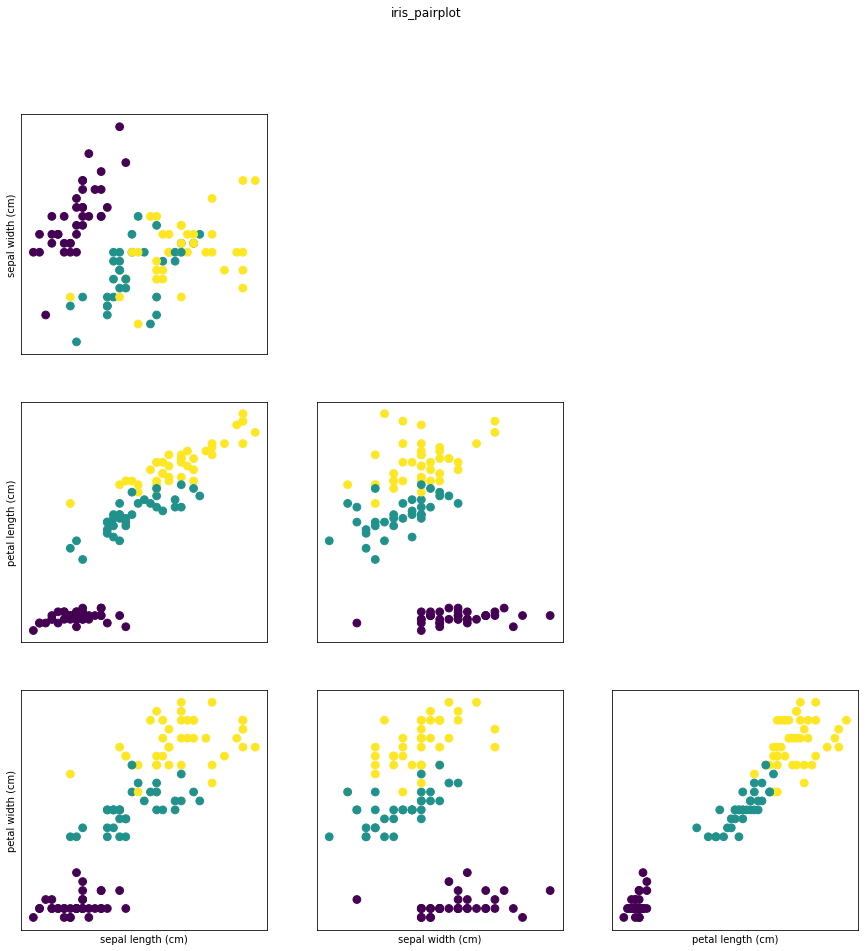

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
plt.suptitle("iris_pairplot")

for i in range(3):
    for j in range(3):
        ax[i, j].scatter(X_train[:, j], X_train[:, i + 1], c=y_train, s=60)
        ax[i, j].set_xticks(())
        ax[i, j].set_yticks(())
        if i == 2:
            ax[i, j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i, j].set_ylabel(iris['feature_names'][i + 1])
        if j > i:
            ax[i, j].set_visible(False)
            
plt.show()

From the plots, we can see that the three classes seem to be relatively well separated
using the sepal and petal measurements. This means that a machine learning model
will likely be able to learn to separate them.

**Building the first model: k nearest neighbors**

Building this model only consists of storing the training set. To make a prediction for
a new data point, the algorithm finds the point in the training set that is closest to the
new point. Then, it and assigns the label of this closest data training point to the new
data point.

The k in k nearest neighbors stands for the fact that instead of using only the closest
neighbor to the new data point, we can consider any fixed number k of neighbors in
the training (for example, the closest three or five neighbors). Then, we can make a
prediction using the majority class among these neighbors. We will go into more
details about this later.

All machine learning models in scikit-learn are implemented in their own class,
which are called Estimator classes. The k nearest neighbors classification algorithm
is implemented in the KNeighborsClassifier class in the neighbors module.

Before we can use the model, we need to instantiate the class into an object. This is
when we will set any parameters of the model. The single parameter of the KNeighbor
sClassifier is the number of neighbors, which we will set to one

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

The knn object encapsulates the algorithm to build the model from the training data,
as well the algorithm to make predictions on new data points.

It will also hold the information the algorithm has extracted from the training data.
In the case of KNeighborsClassifier , it will just store the training set.

To build the model on the training set, we call the fit method of the knn object,
which takes as arguments the numpy array X_train containing the training data and
the numpy array y_train of the corresponding training labels

In [23]:
knn.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, \
                     n_neighbors=1, p=2, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Imagine we found an iris in the wild with a sepal length of 5cm, a sepal width of
2.9cm, a petal length of 1cm and a petal width of 0.2cm. What species of iris would
this be?

We can put this data into a numpy array, again with the shape number of samples
(one) times number of features (four)

In [25]:
import numpy as np

X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

To make prediction we call the predict method of the knn object

In [26]:
prediction = knn.predict(X_new)
prediction

array([0])

In [28]:
iris['target_names'][prediction]

array(['setosa'], 
      dtype='<U10')

**Evaluating the model**

This is where the test set that we created earlier comes in. This data was not used to
build the model, but we do know what the correct species are for each iris in the test
set.

We can make a prediction for an iris in the test data, and compare it against its label
(the known species). We can measure how well the model works by computing the
accuracy, which is the fraction of flowers for which the right species was predicted

In [29]:
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

0.97368421052631582

We can also use the score method of the knn object, which will compute the test set
accuracy for us.

In [30]:
knn.score(X_test, y_test)

0.97368421052631582

For this model, the test set accuracy is about 0.97, which means we made the right
prediction for 97% of the irises in the test set. Under some mathematical assump‐
tions, this means that we can expect our model to be correct 97% of the time for new
irises